**Import modules + libraries**

In [157]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [158]:
# Import the libraries
import functions
import dictionaries

In [159]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [160]:
#read in the Track.h5 file to a pandas dataframe
tracks_nmin_118=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin118.h5','table')
tracks_nmin987=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin987.h5','table')
tracks_nmin1481=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin1481.h5','table')
tracks_nmin1550=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin1550.h5','table')
tracks_nmin1975=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin1975.h5','table')
tracks_nmin2469=pd.read_hdf('Save/Jan_2000/n_min_threshold/Track_nmin2469.h5','table')

#convert ['timestr'] column to datetime in dataframe
tracks_nmin_118.timestr=tracks_nmin_118.timestr.astype(str)
tracks_nmin_118['datetime'] = pd.to_datetime(tracks_nmin_118.timestr.str.split(',\s*').str[0])
set(tracks_nmin_118['datetime'])

tracks_nmin987.timestr=tracks_nmin987.timestr.astype(str)
tracks_nmin987['datetime'] = pd.to_datetime(tracks_nmin987.timestr.str.split(',\s*').str[0])
set(tracks_nmin987['datetime'])

tracks_nmin1481.timestr=tracks_nmin1481.timestr.astype(str)
tracks_nmin1481['datetime'] = pd.to_datetime(tracks_nmin1481.timestr.str.split(',\s*').str[0])
set(tracks_nmin1481['datetime'])

tracks_nmin1550.timestr=tracks_nmin1550.timestr.astype(str)
tracks_nmin1550['datetime'] = pd.to_datetime(tracks_nmin1550.timestr.str.split(',\s*').str[0])
set(tracks_nmin1550['datetime'])

tracks_nmin1975.timestr=tracks_nmin1975.timestr.astype(str)
tracks_nmin1975['datetime'] = pd.to_datetime(tracks_nmin1975.timestr.str.split(',\s*').str[0])
set(tracks_nmin1975['datetime'])

tracks_nmin2469.timestr=tracks_nmin2469.timestr.astype(str)
tracks_nmin2469['datetime'] = pd.to_datetime(tracks_nmin2469.timestr.str.split(',\s*').str[0])
set(tracks_nmin2469['datetime'])

{Timestamp('1998-07-01 00:30:00'),
 Timestamp('1998-07-01 01:30:00'),
 Timestamp('1998-07-01 02:30:00'),
 Timestamp('1998-07-01 03:30:00'),
 Timestamp('1998-07-01 04:30:00'),
 Timestamp('1998-07-01 05:30:00'),
 Timestamp('1998-07-01 06:30:00'),
 Timestamp('1998-07-01 07:30:00'),
 Timestamp('1998-07-01 08:30:00'),
 Timestamp('1998-07-01 09:30:00'),
 Timestamp('1998-07-01 10:30:00'),
 Timestamp('1998-07-01 11:30:00'),
 Timestamp('1998-07-01 12:30:00'),
 Timestamp('1998-07-01 13:30:00'),
 Timestamp('1998-07-01 14:30:00'),
 Timestamp('1998-07-01 15:30:00'),
 Timestamp('1998-07-01 16:30:00'),
 Timestamp('1998-07-01 17:30:00'),
 Timestamp('1998-07-01 18:30:00'),
 Timestamp('1998-07-01 19:30:00'),
 Timestamp('1998-07-01 20:30:00'),
 Timestamp('1998-07-01 21:30:00'),
 Timestamp('1998-07-01 22:30:00'),
 Timestamp('1998-07-01 23:30:00'),
 Timestamp('1998-07-02 00:30:00'),
 Timestamp('1998-07-02 01:30:00'),
 Timestamp('1998-07-02 02:30:00'),
 Timestamp('1998-07-02 03:30:00'),
 Timestamp('1998-07-

In [161]:
tracks_nmin_118

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,1,94.603204,993.422405,35984,240,1,1998-07-01 00:30:00,1998-07-01 00:30:00,-36.208621,-44.806350,315.193650,315.193650,1,0 days 00:00:00,1998-07-01 00:30:00
1,0,2,33.649185,362.386090,726,240,2,1998-07-01 00:30:00,1998-07-01 00:30:00,-38.677260,-70.363301,289.636699,289.636699,-1,0 days 00:00:00,1998-07-01 00:30:00
2,0,5,62.400459,887.058625,243,240,3,1998-07-01 00:30:00,1998-07-01 00:30:00,-37.512832,-49.114081,310.885919,310.885919,-1,0 days 00:00:00,1998-07-01 00:30:00
3,0,9,90.130085,881.486125,896,240,4,1998-07-01 00:30:00,1998-07-01 00:30:00,-36.389782,-49.339750,310.660250,310.660250,-1,0 days 00:00:00,1998-07-01 00:30:00
4,0,10,100.748633,701.814897,1328,240,5,1998-07-01 00:30:00,1998-07-01 00:30:00,-35.959731,-56.616444,303.383556,303.383556,-1,0 days 00:00:00,1998-07-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44049,743,193,1332.906162,86.925123,270,240,44050,1998-07-31 23:30:00,1998-07-31 23:30:00,13.942649,-81.519481,278.480519,278.480519,-1,30 days 23:00:00,1998-07-31 23:30:00
44050,743,194,1329.113659,450.074078,153,240,44051,1998-07-31 23:30:00,1998-07-31 23:30:00,13.789054,-66.811942,293.188058,293.188058,-1,30 days 23:00:00,1998-07-31 23:30:00
44051,743,198,1335.398979,108.312869,232,240,44052,1998-07-31 23:30:00,1998-07-31 23:30:00,14.043609,-80.653284,279.346716,279.346716,-1,30 days 23:00:00,1998-07-31 23:30:00
44052,743,200,1336.982986,212.081106,191,240,44053,1998-07-31 23:30:00,1998-07-31 23:30:00,14.107759,-76.450664,283.549336,283.549336,-1,30 days 23:00:00,1998-07-31 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [162]:
#225K threshold
init_hours_nmin118 = functions.get_mcs_init(tracks_nmin_118)
init_hours_nmin118 = np.array(init_hours_nmin118)
init_hours_nmin118, bins = np.histogram(init_hours_nmin118, bins = np.arange(0,25))

diss_hours_nmin118 = functions.get_mcs_diss(tracks_nmin_118)
diss_hours_nmin118 = np.array(diss_hours_nmin118)
diss_hours_nmin118, bins = np.histogram(diss_hours_nmin118, bins = np.arange(0,25))

init_nmin118 = init_hours_nmin118/np.nansum(init_hours_nmin118) * 100
diss_nmin118 = diss_hours_nmin118/np.nansum(diss_hours_nmin118) * 100

#230K threshold
init_hours_nmin987 = functions.get_mcs_init(tracks_nmin987)
init_hours_nmin987 = np.array(init_hours_nmin987)
init_hours_nmin987, bins = np.histogram(init_hours_nmin987, bins = np.arange(0,25))

diss_hours_nmin987 = functions.get_mcs_diss(tracks_nmin987)
diss_hours_nmin987 = np.array(diss_hours_nmin987)
diss_hours_nmin987, bins = np.histogram(diss_hours_nmin987, bins = np.arange(0,25))

init_nmin987 = init_hours_nmin987/np.nansum(init_hours_nmin987) * 100
diss_nmin987 = diss_hours_nmin987/np.nansum(diss_hours_nmin987) * 100

#235K threshold
init_hours_nmin1481 = functions.get_mcs_init(tracks_nmin1481)
init_hours_nmin1481 = np.array(init_hours_nmin1481)
init_hours_nmin1481, bins = np.histogram(init_hours_nmin1481, bins = np.arange(0,25))

diss_hours_nmin1481 = functions.get_mcs_diss(tracks_nmin1481)
diss_hours_nmin1481 = np.array(diss_hours_nmin1481)
diss_hours_nmin1481, bins = np.histogram(diss_hours_nmin1481, bins = np.arange(0,25))

init_nmin1481 = init_hours_nmin1481/np.nansum(init_hours_nmin1481) * 100
diss_nmin1481 = diss_hours_nmin1481/np.nansum(diss_hours_nmin1481) * 100

#240K threshold
init_hours_nmin1550 = functions.get_mcs_init(tracks_nmin1550)
init_hours_nmin1550 = np.array(init_hours_nmin1550)
init_hours_nmin1550, bins = np.histogram(init_hours_nmin1550, bins = np.arange(0,25))

diss_hours_nmin1550 = functions.get_mcs_diss(tracks_nmin1550)
diss_hours_nmin1550 = np.array(diss_hours_nmin1550)
diss_hours_nmin1550, bins = np.histogram(diss_hours_nmin1550, bins = np.arange(0,25))

init_nmin1550 = init_hours_nmin1550/np.nansum(init_hours_nmin1550) * 100
diss_nmin1550 = diss_hours_nmin1550/np.nansum(diss_hours_nmin1550) * 100

#241K threshold
init_hours_nmin1975 = functions.get_mcs_init(tracks_nmin1975)
init_hours_nmin1975 = np.array(init_hours_nmin1975)
init_hours_nmin1975, bins = np.histogram(init_hours_nmin1975, bins = np.arange(0,25))

diss_hours_nmin1975 = functions.get_mcs_diss(tracks_nmin1975)
diss_hours_nmin1975 = np.array(diss_hours_nmin1975)
diss_hours_nmin1975, bins = np.histogram(diss_hours_nmin1975, bins = np.arange(0,25))

init_nmin1975 = init_hours_nmin1975/np.nansum(init_hours_nmin1975) * 100
diss_nmin1975 = diss_hours_nmin1975/np.nansum(diss_hours_nmin1975) * 100

#245K threshold
init_hours_nmin2469 = functions.get_mcs_init(tracks_nmin2469)
init_hours_nmin2469 = np.array(init_hours_nmin2469)
init_hours_nmin2469, bins = np.histogram(init_hours_nmin2469, bins = np.arange(0,25))

diss_hours_nmin2469 = functions.get_mcs_diss(tracks_nmin2469)
diss_hours_nmin2469 = np.array(diss_hours_nmin2469)
diss_hours_nmin2469, bins = np.histogram(diss_hours_nmin2469, bins = np.arange(0,25))

init_nmin2469 = init_hours_nmin2469/np.nansum(init_hours_nmin2469) * 100
diss_nmin2469 = diss_hours_nmin2469/np.nansum(diss_hours_nmin2469) * 100


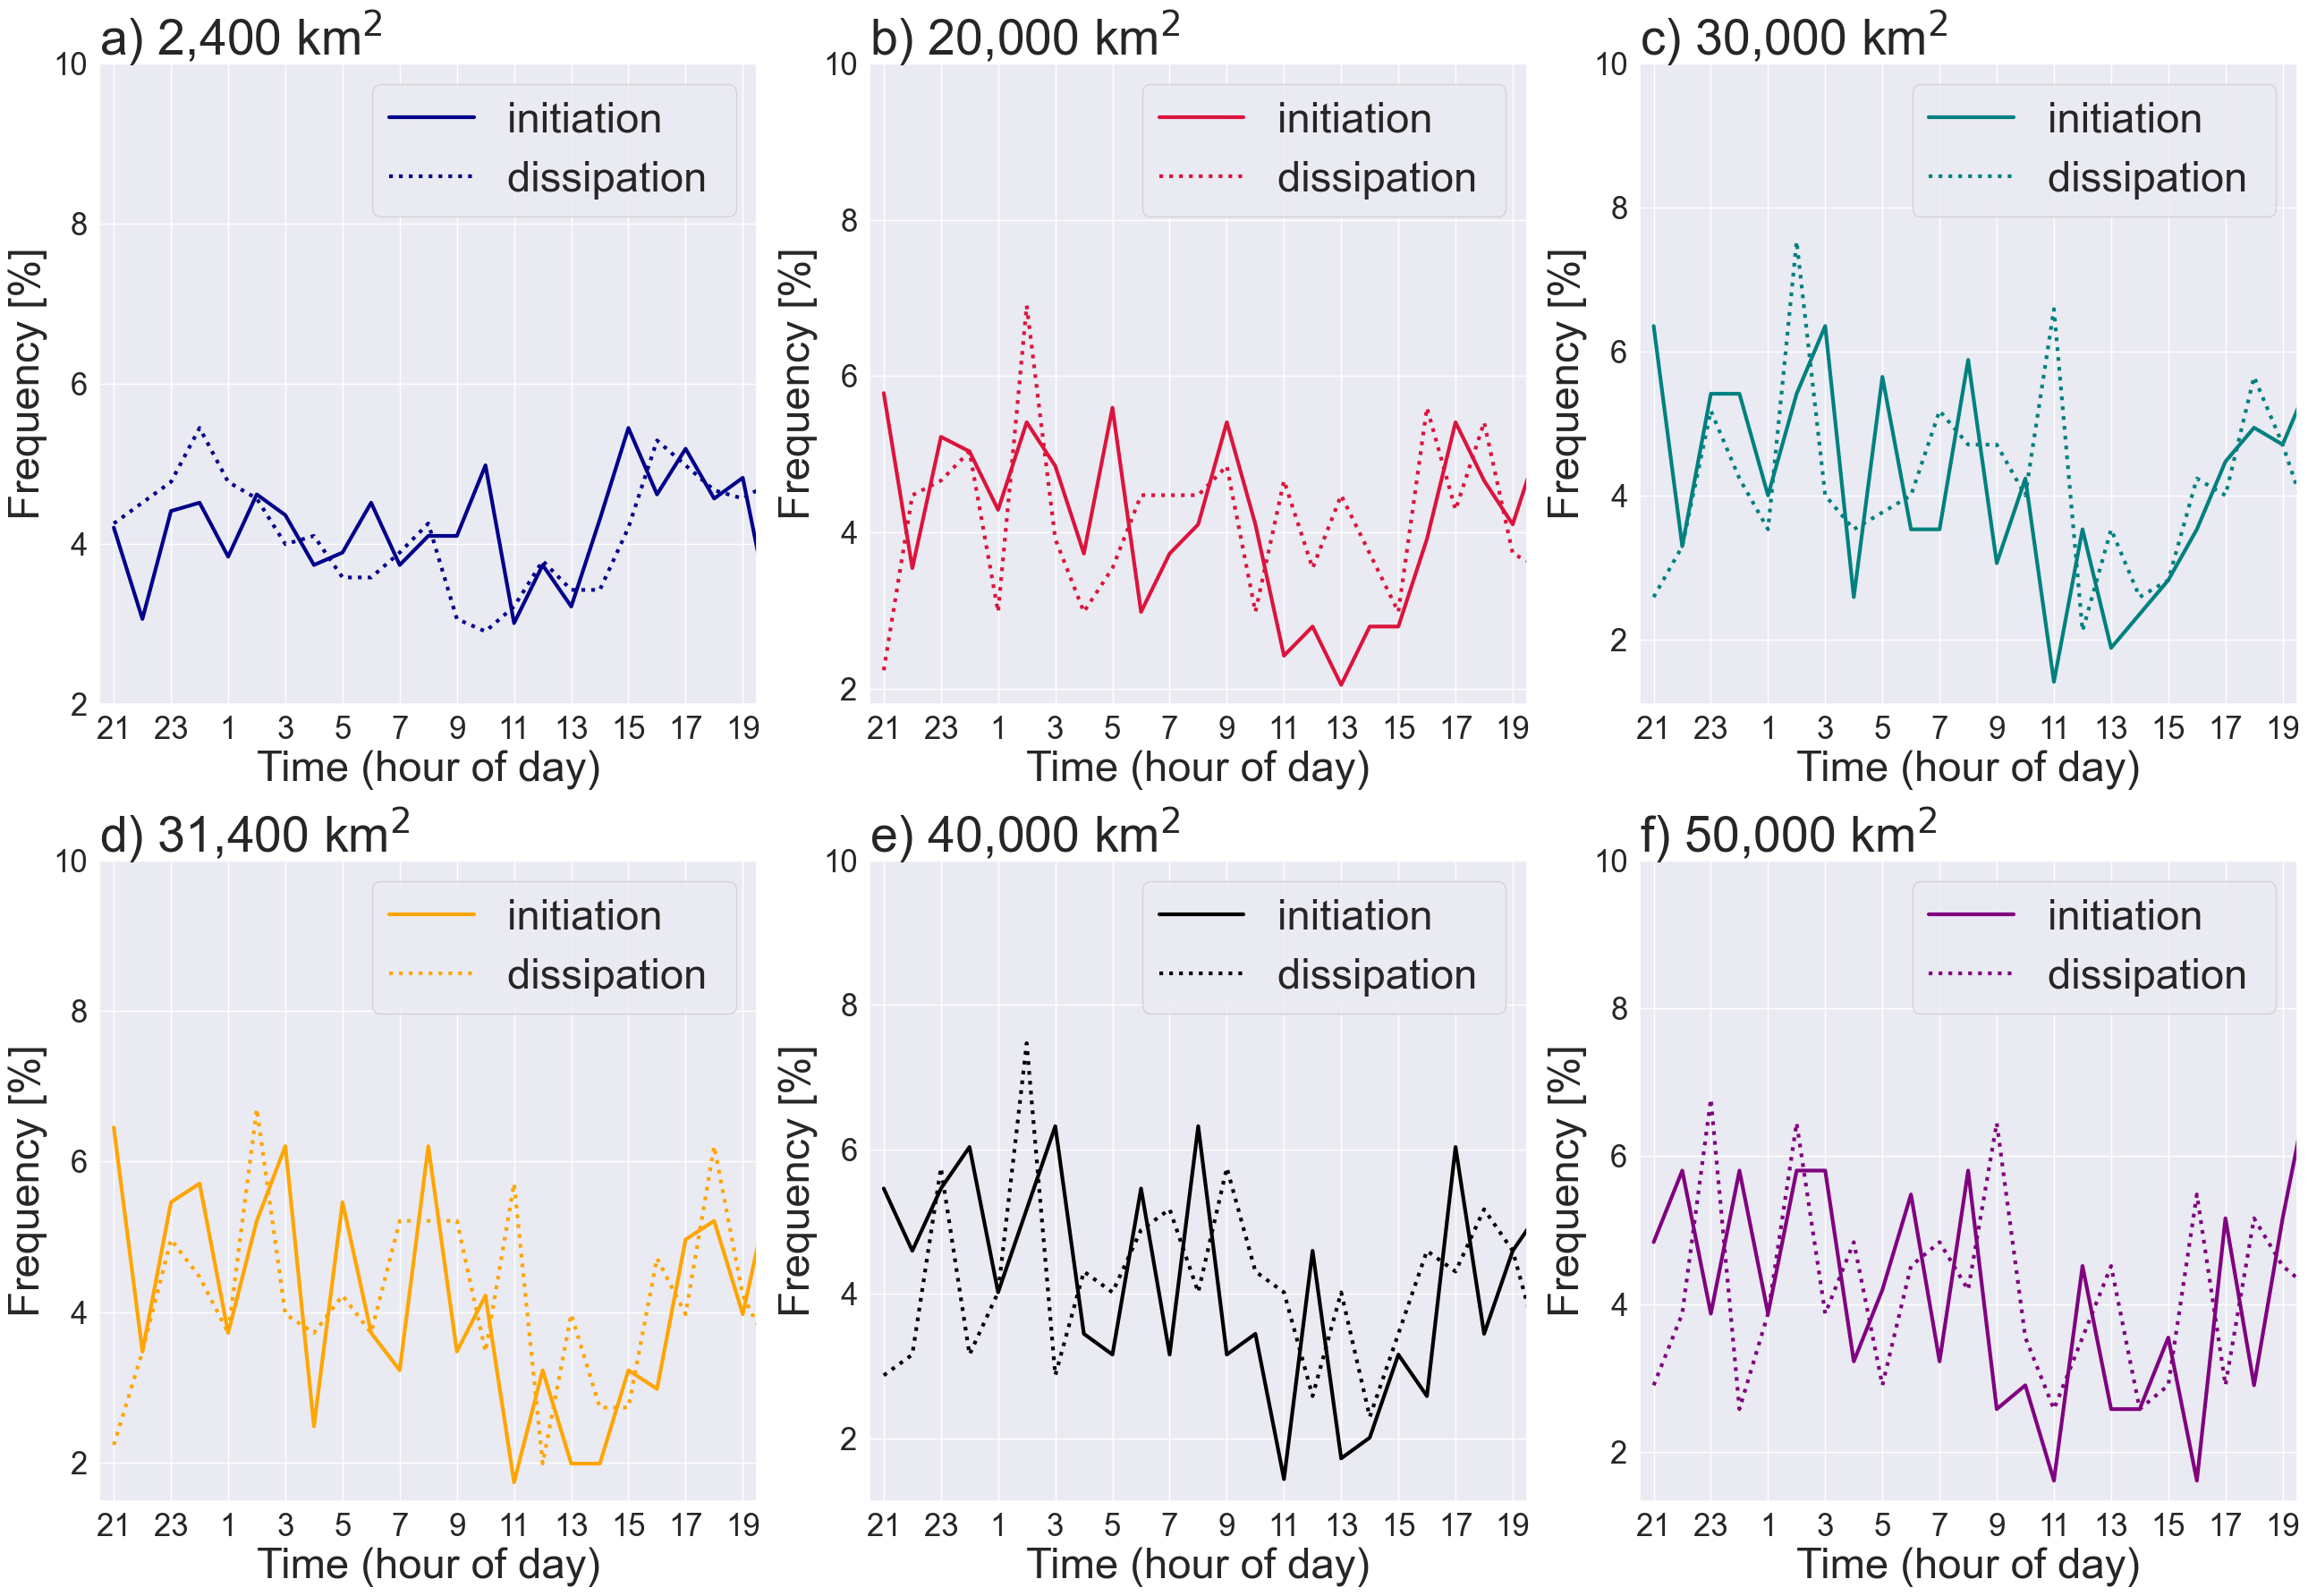

In [163]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
t= 40
f= 34
lf= 25

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= t )
ax1.plot(np.arange(0,24), init_nmin118, label = 'initiation ', color= 'darkblue', linewidth = 3)
ax1.plot(np.arange(0,24), diss_nmin118, label = 'dissipation ', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
ax1.legend(fontsize=f)
ax1.set_yticks(np.arange(2,12,2))
ax1.set_xticks(np.arange(0,23)[::2])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=lf)
ax1.set_xticklabels(labels,fontsize= lf)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Time (hour of day)', fontsize= f)
ax1.set_ylabel('Frequency [%]', fontsize= f)

ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= t )
ax2.plot(np.arange(0,24), init_nmin987, label = 'initiation ', color= 'crimson', linewidth = 3)
ax2.plot(np.arange(0,24), diss_nmin987, label = 'dissipation ', color= 'crimson', linewidth = 3, linestyle = 'dotted')
ax2.legend(fontsize=f)
ax2.set_yticks(np.arange(2,12,2))
ax2.set_xticks(np.arange(0,23)[::2])
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=lf)
ax2.set_xticklabels(labels,fontsize= lf)
ax2.set_xlabel('Time (hour of day)', fontsize= f)
ax2.set_ylabel('Frequency [%]', fontsize= f)

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= t )
ax3.plot(np.arange(0,24), init_nmin1481, label = 'initiation ', color= 'teal', linewidth = 3)
ax3.plot(np.arange(0,24), diss_nmin1481, label = 'dissipation ', color= 'teal', linewidth = 3, linestyle = 'dotted')
ax3.legend(fontsize=f)
ax3.set_yticks(np.arange(2,12,2))
ax3.set_xticks(np.arange(0,23)[::2])
ax3.set_yticklabels(ax3.get_yticks(),fontsize=lf)
ax3.set_xticklabels(labels,fontsize= lf)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Time (hour of day)', fontsize= f)
ax3.set_ylabel('Frequency [%]', fontsize= f)

ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= t )
ax4.plot(np.arange(0,24), init_nmin1550, label = 'initiation ', color= 'orange', linewidth = 3)
ax4.plot(np.arange(0,24), diss_nmin1550, label = 'dissipation ', color= 'orange', linewidth = 3, linestyle = 'dotted')
ax4.legend(fontsize=f)
ax4.set_yticks(np.arange(2,12,2))
ax4.set_xticks(np.arange(0,23)[::2])
ax4.set_yticklabels(ax4.get_yticks(),fontsize=lf)
ax4.set_xticklabels(labels,fontsize= lf)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Time (hour of day)', fontsize= f)
ax4.set_ylabel('Frequency [%]', fontsize= f)

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= t )
ax5.plot(np.arange(0,24), init_nmin1975, label = 'initiation ', color= 'black', linewidth = 3)
ax5.plot(np.arange(0,24), diss_nmin1975, label = 'dissipation ', color= 'black', linewidth = 3, linestyle = 'dotted')
ax5.legend(fontsize=f)
ax5.set_yticks(np.arange(2,12,2))
ax5.set_xticks(np.arange(0,23)[::2])
ax5.set_yticklabels(ax5.get_yticks(),fontsize=lf)
ax5.set_xticklabels(labels,fontsize= lf)
ax5.set_xlim(-0.5,22.5)
ax5.set_xlabel('Time (hour of day)', fontsize= f)
ax5.set_ylabel('Frequency [%]', fontsize= f)

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= t )
ax6.plot(np.arange(0,24), init_nmin2469, label = 'initiation ', color= 'purple', linewidth = 3)
ax6.plot(np.arange(0,24), diss_nmin2469, label = 'dissipation ', color= 'purple', linewidth = 3, linestyle = 'dotted')
ax6.legend(fontsize=f)
ax6.set_yticks(np.arange(2,12,2))
ax6.set_xticks(np.arange(0,23)[::2])
ax6.set_yticklabels(ax6.get_yticks(),fontsize=lf)
ax6.set_xticklabels(labels,fontsize= lf)
ax6.set_xlim(-0.5,22.5)
ax6.set_xlabel('Time (hour of day)', fontsize= f)
ax6.set_ylabel('Frequency [%]', fontsize= f)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/nminthreshold/Init_diss_nminthresholds.png')



In [164]:
init_lats_nmin118, init_lons_nmin118, diss_lats_nmin118, diss_lons_nmin118 = functions.get_init(tracks_nmin_118)
init_lats_nmin987, init_lons_nmin987, diss_lats_nmin987, diss_lons_nmin987 = functions.get_init(tracks_nmin987)
init_lats_nmin1481, init_lons_nmin1481, diss_lats_nmin1481, diss_lons_nmin1481 = functions.get_init(tracks_nmin1481)
init_lats_nmin1550, init_lons_nmin1550, diss_lats_nmin1550, diss_lons_nmin1550 = functions.get_init(tracks_nmin1550)
init_lats_nmin1975, init_lons_nmin1975, diss_lats_nmin1975, diss_lons_nmin1975 = functions.get_init(tracks_nmin1975)
init_lats_nmin2469, init_lons_nmin2469, diss_lats_nmin2469, diss_lons_nmin2469 = functions.get_init(tracks_nmin2469)




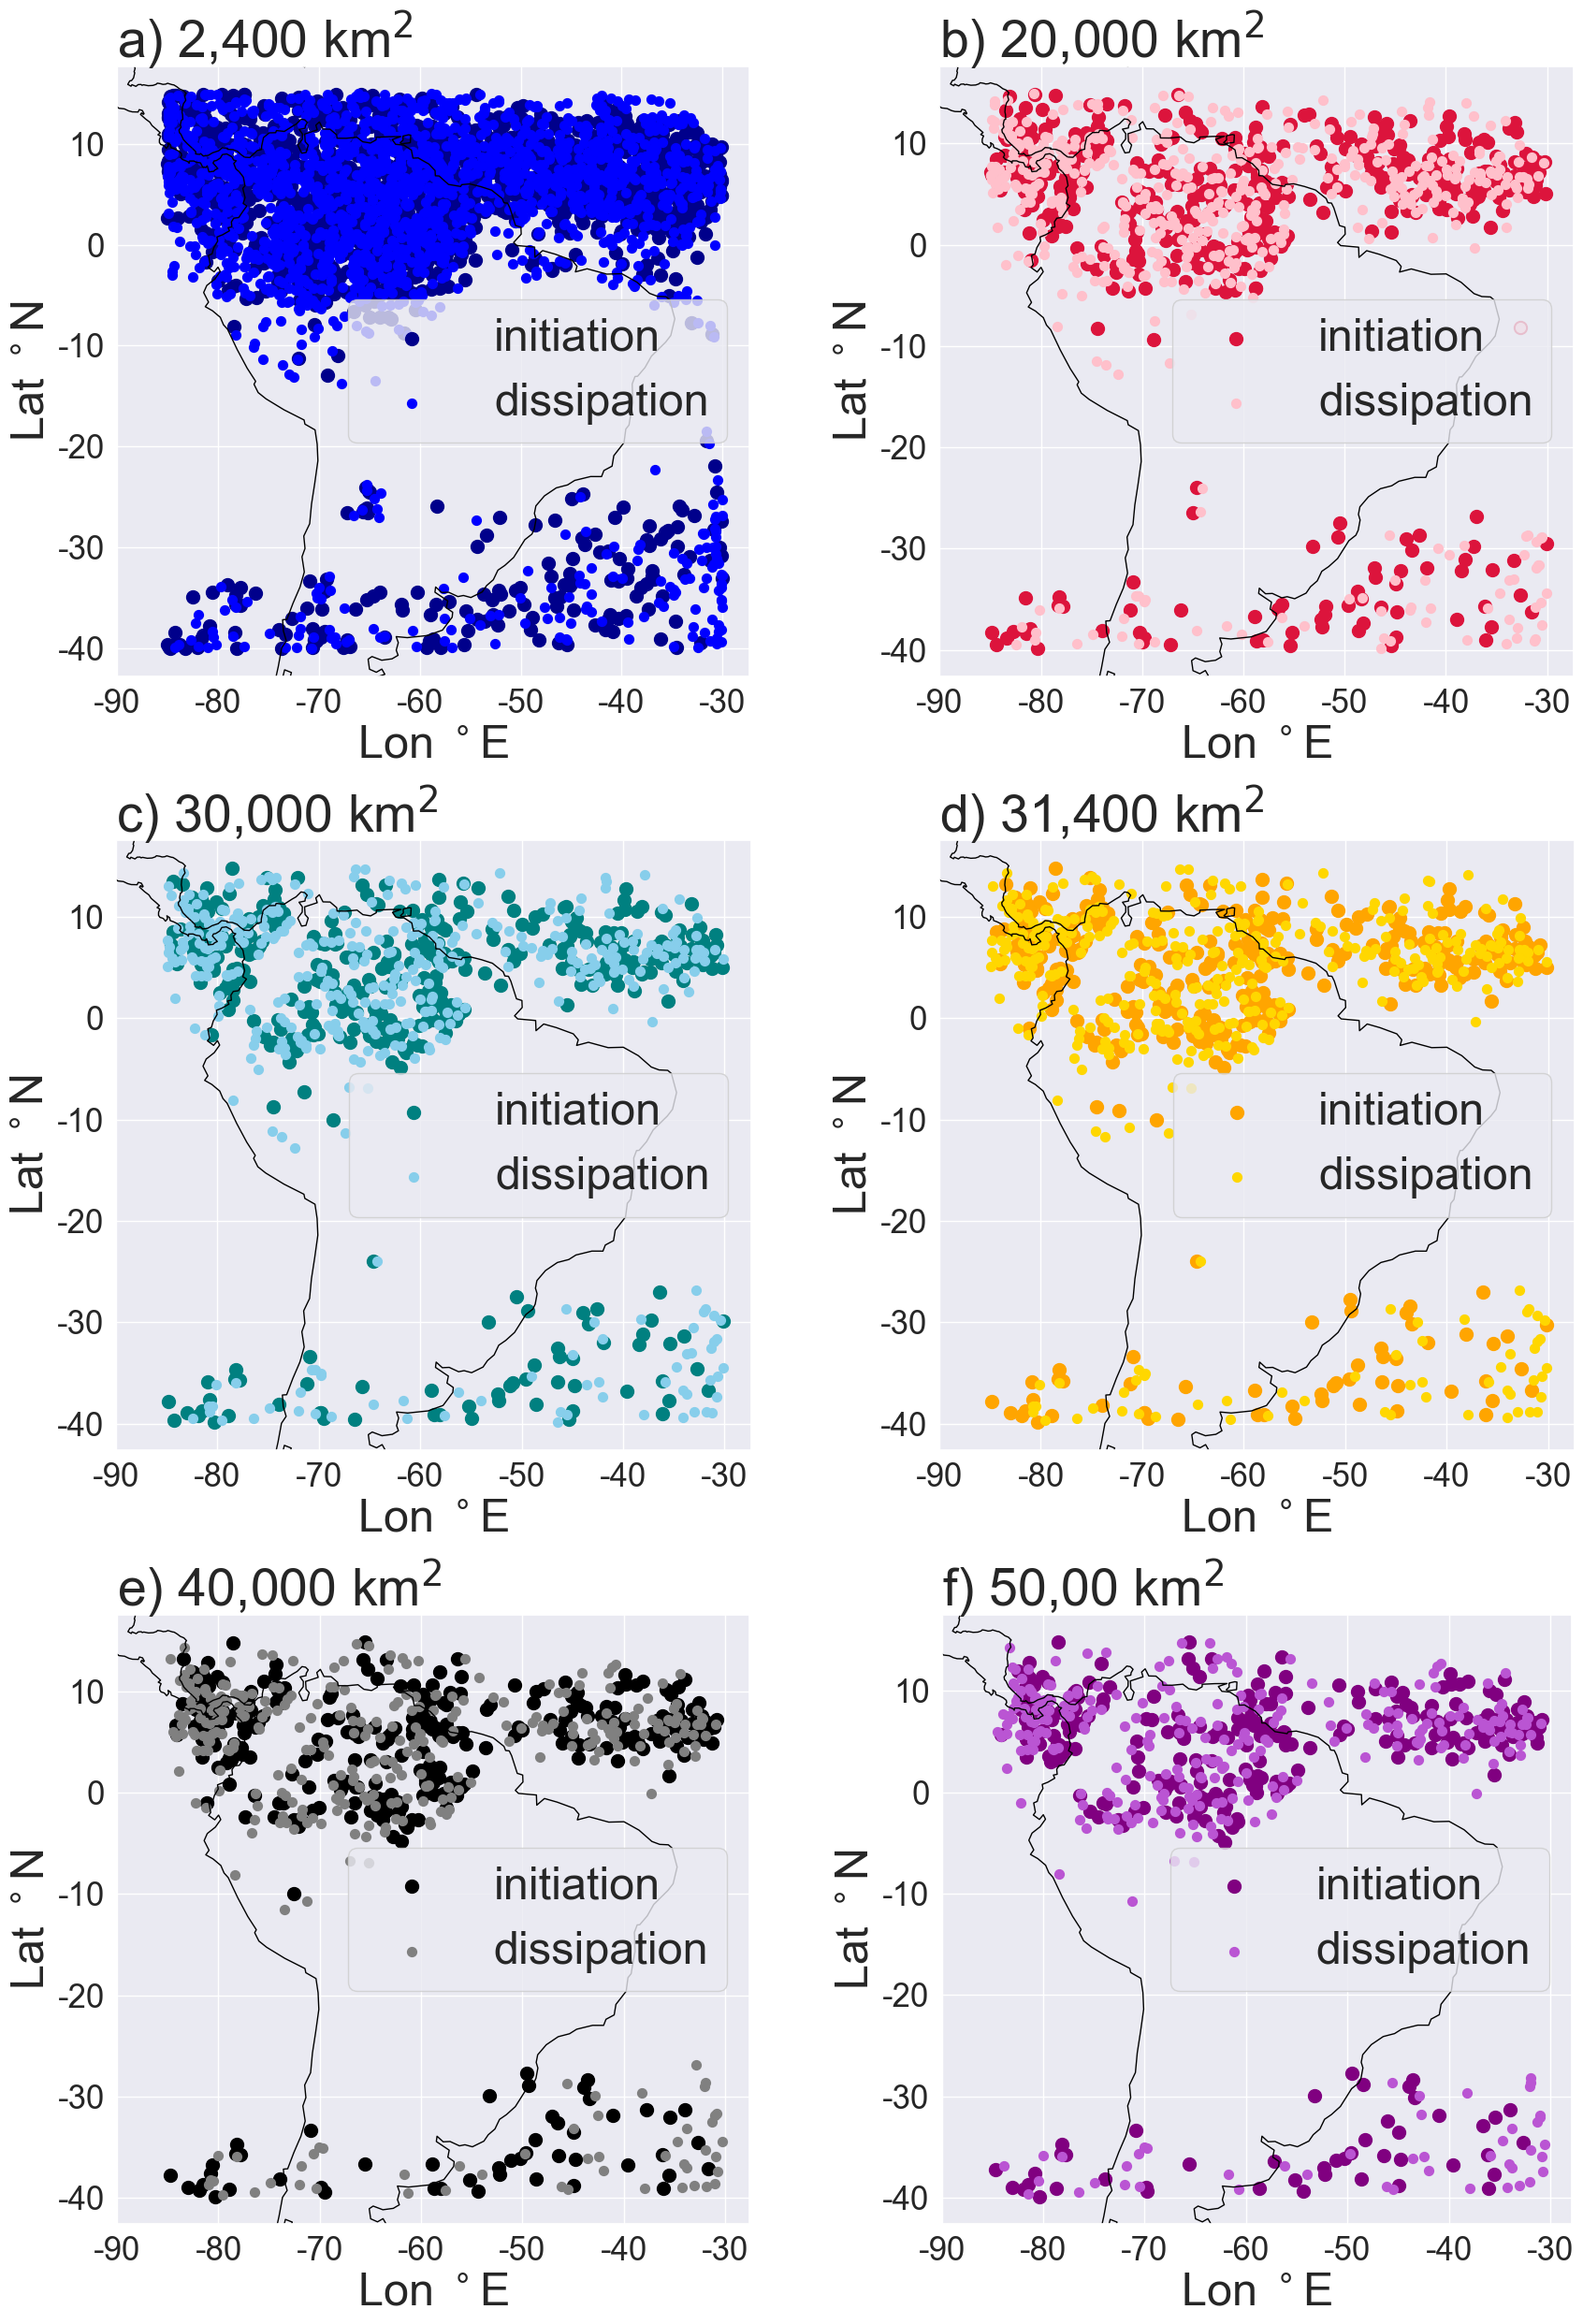

In [165]:
import cartopy.crs as ccrs

plt.figure(figsize=(18,25))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
t= 40
f= 35
lf= 25


# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= t )
ax1.scatter(init_lons_nmin118, init_lats_nmin118,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_nmin118, diss_lats_nmin118,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= f)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=f)

ax2 = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= t )
ax2.scatter(init_lons_nmin987, init_lats_nmin987,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_nmin987, diss_lats_nmin987,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= f)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=f)

ax3 = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= t )
ax3.scatter(init_lons_nmin1481, init_lats_nmin1481,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_nmin1481, diss_lats_nmin1481,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= f)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=f)

ax4 = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= t )
ax4.scatter(init_lons_nmin1550, init_lats_nmin1550,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_nmin1550, diss_lats_nmin1550,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= f)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=f)

ax5 = plt.subplot(3, 2, 5, projection=ccrs.PlateCarree())
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= t )
ax5.scatter(init_lons_nmin1975, init_lats_nmin1975,  color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax5.scatter(diss_lons_nmin1975, diss_lats_nmin1975,  color='grey',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax5.coastlines()
ax5.legend(fontsize= f)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=f)

ax6 = plt.subplot(3, 2, 6, projection=ccrs.PlateCarree())
ax6.set_title('f) 50,00 km$^{2}$ ', loc='left', fontsize= t )
ax6.scatter(init_lons_nmin2469, init_lats_nmin2469,  color='purple',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax6.scatter(diss_lons_nmin2469, diss_lats_nmin2469,  color='mediumorchid',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax6.coastlines()
ax6.legend(fontsize= f)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xticklabels(ax1.get_xticks().astype(int),fontsize=lf)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=f)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=f)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/nminthreshold/Init_diss_loc_nminthresholds.png')


**MCS area analysis (converts from grid points to area (km2) within function)**

In [166]:
area_nmin118=functions.get_area(tracks_nmin_118)
area_nmin987=functions.get_area(tracks_nmin987)
area_nmin1481=functions.get_area(tracks_nmin1481)
area_nmin1550=functions.get_area(tracks_nmin1550)
area_nmin1975=functions.get_area(tracks_nmin1975)
area_nmin2469=functions.get_area(tracks_nmin2469)


array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


In [167]:
print(area_nmin118)

[ 20726.18139422 659287.20535714 102674.25       ...  18349.39285714
  23416.59375     10570.5       ]


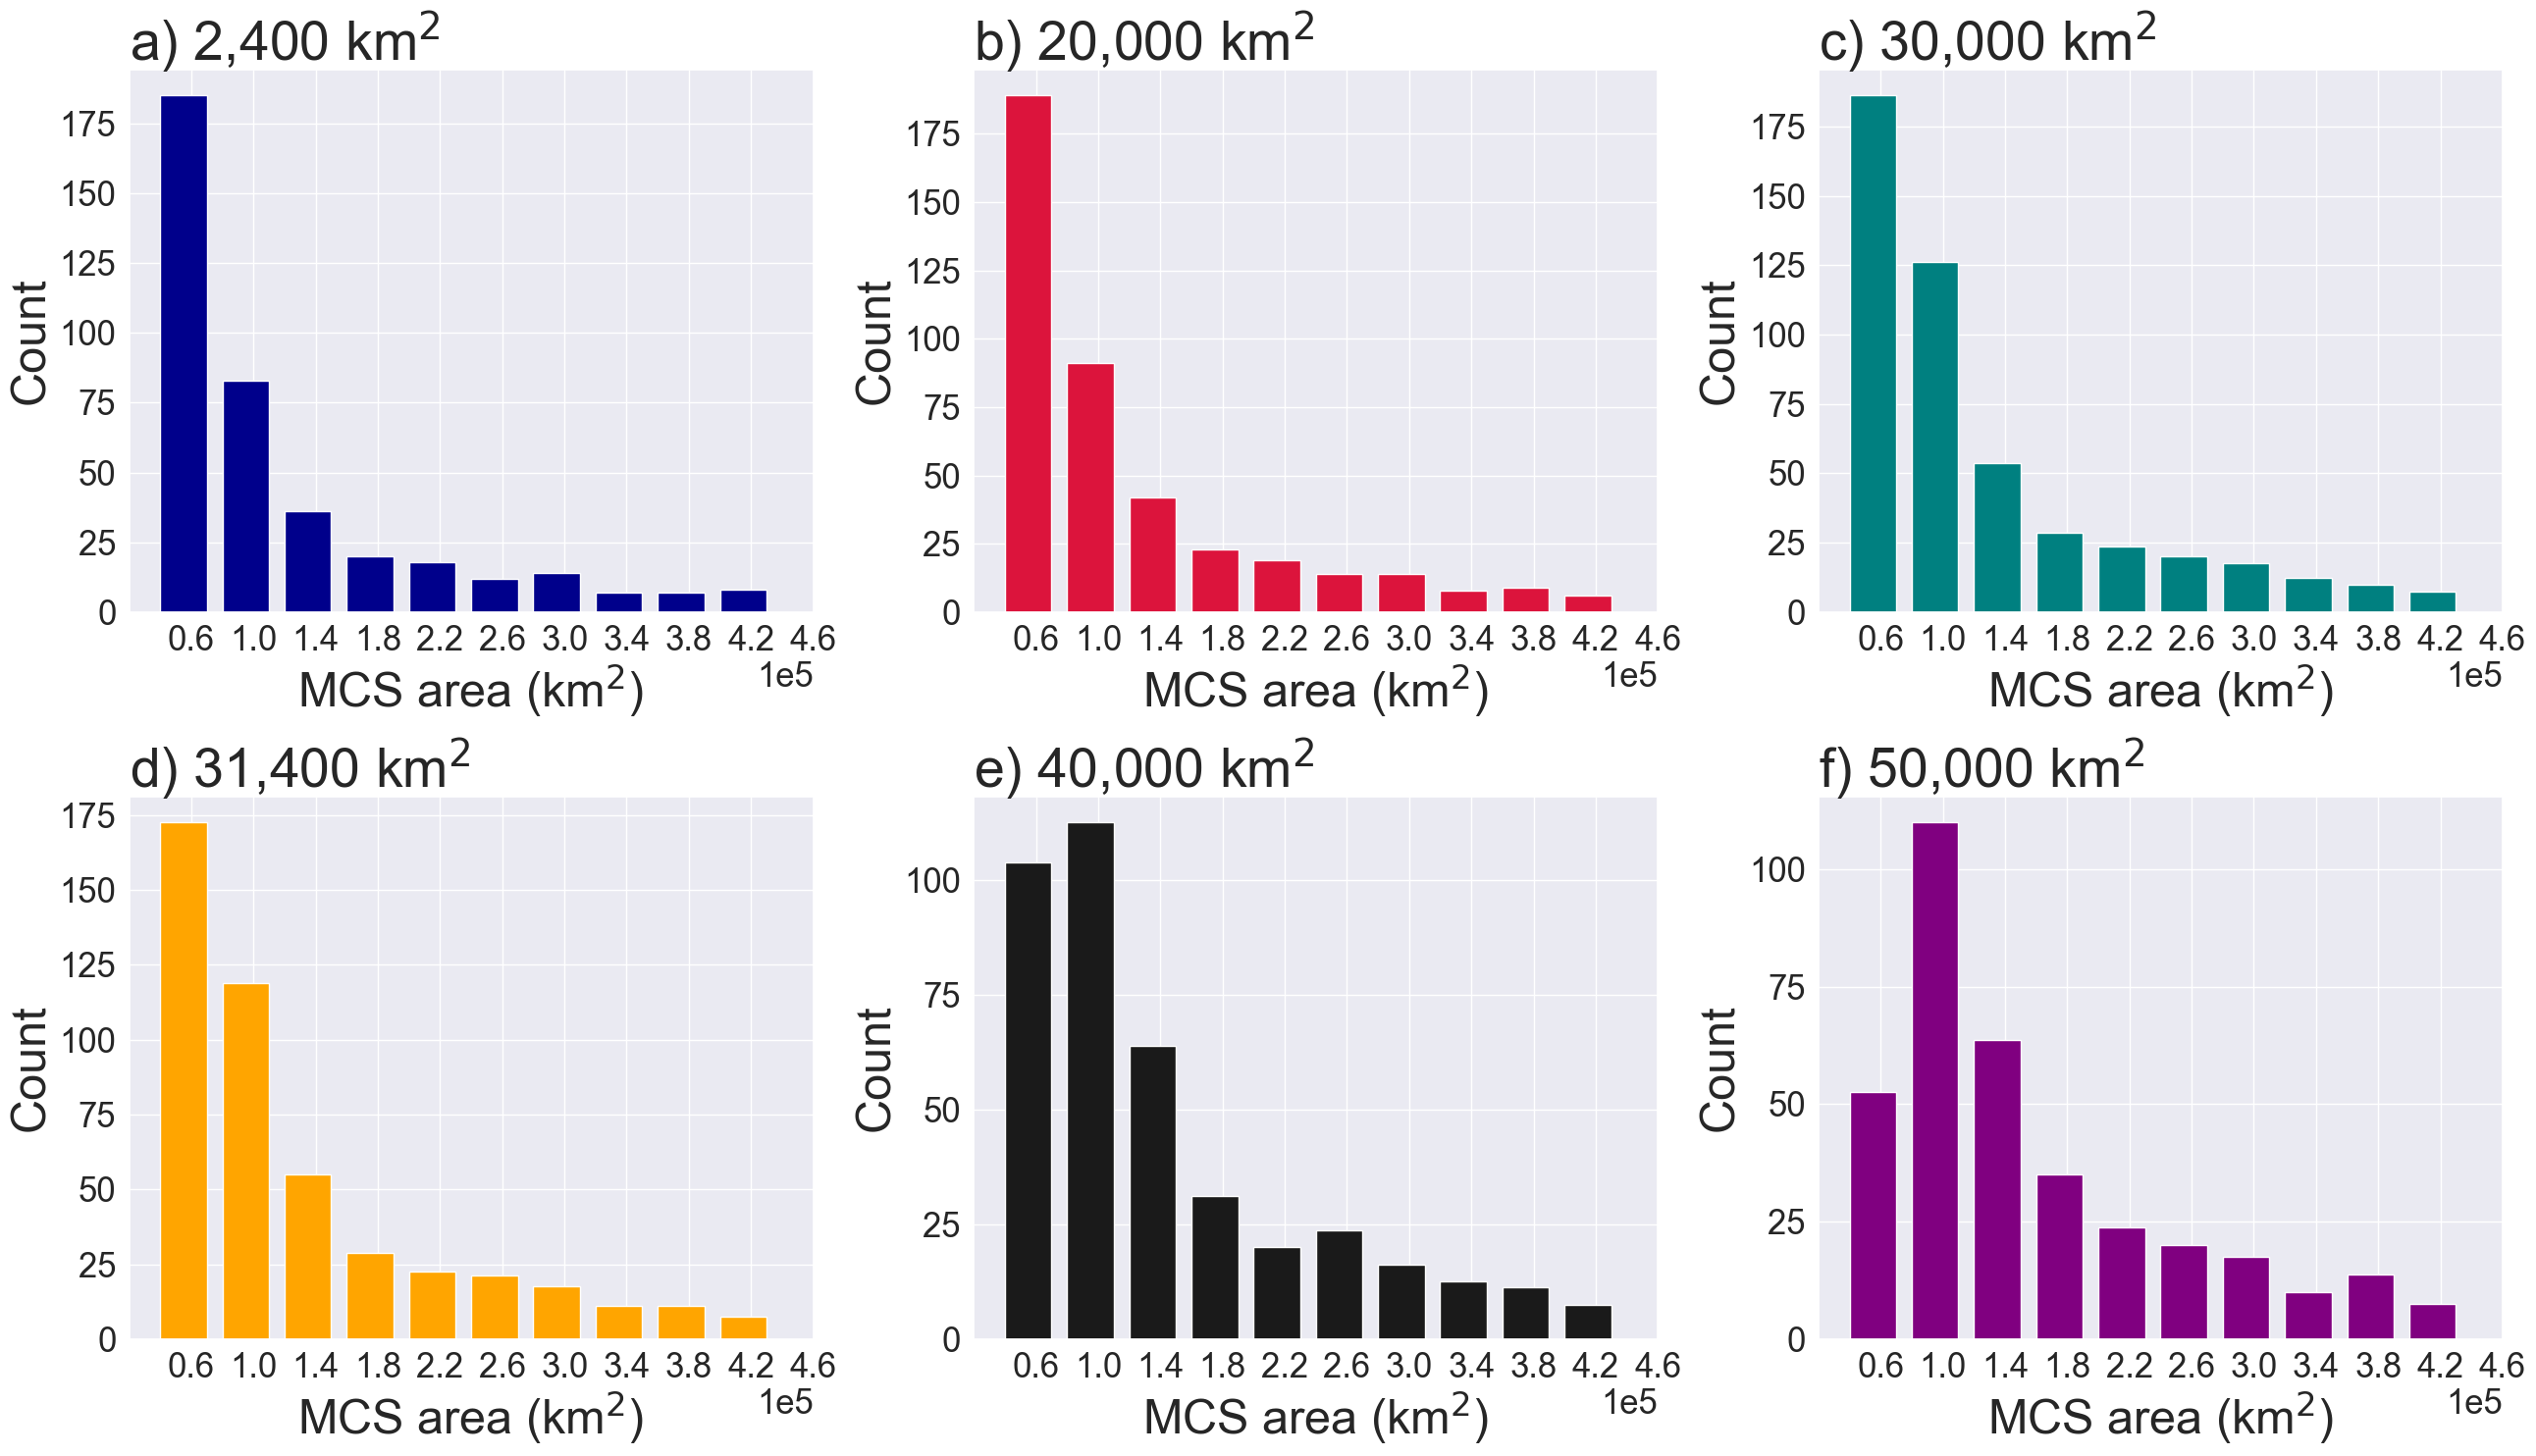

In [168]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
t= 40
f = 35
lf= 25

ax1=plt.subplot(2,3,1)
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= t )
ax1.hist(area_nmin118,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'darkblue')
ax1.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax1.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.xaxis.get_offset_text().set_fontsize(25)
ax1.xaxis.set_tick_params(labelsize=lf)
ax1.set_ylabel('Count',fontsize=f)

ax2=plt.subplot(2,3,2)
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= t )
ax2.hist(area_nmin987,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'crimson')
ax2.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax2.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax2.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.xaxis.get_offset_text().set_fontsize(25)
ax2.xaxis.set_tick_params(labelsize=lf)
ax2.set_ylabel('Count',fontsize=f)

ax3=plt.subplot(2,3,3)
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= t )
ax3.hist(area_nmin1481,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'teal')
ax3.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax3.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax3.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.xaxis.get_offset_text().set_fontsize(25)
ax3.xaxis.set_tick_params(labelsize=lf)
ax3.set_ylabel('Count',fontsize=f)

ax4=plt.subplot(2,3,4)
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= t )
ax4.hist(area_nmin1550,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'orange')
ax4.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax4.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax4.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.xaxis.get_offset_text().set_fontsize(25)
ax4.xaxis.set_tick_params(labelsize=lf)
ax4.set_ylabel('Count',fontsize=f)

ax5=plt.subplot(2,3,5)
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= t )
ax5.hist(area_nmin1975,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'k')
ax5.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax5.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax5.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.xaxis.get_offset_text().set_fontsize(25)
ax5.xaxis.set_tick_params(labelsize=lf)
ax5.set_ylabel('Count',fontsize=f)

ax6=plt.subplot(2,3,6)
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= t )
ax6.hist(area_nmin2469,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'purple')
ax6.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax6.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax6.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.xaxis.get_offset_text().set_fontsize(25)
ax6.xaxis.set_tick_params(labelsize=lf)
ax6.set_ylabel('Count',fontsize=f)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/nminthreshold/area_hist_nminthresholds.png')


**Analysis of MCS velocity/propagation speed**

In [169]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_nmin118= tobac.calculate_velocity(tracks_nmin_118, method_distance=None)
vel_nmin987= tobac.calculate_velocity(tracks_nmin987, method_distance=None)
vel_nmin1481= tobac.calculate_velocity(tracks_nmin1481, method_distance=None)
vel_nmin1550= tobac.calculate_velocity(tracks_nmin1550, method_distance=None)
vel_nmin1975= tobac.calculate_velocity(tracks_nmin1975, method_distance=None)
vel_nmin2469= tobac.calculate_velocity(tracks_nmin2469, method_distance=None)

In [170]:
velocity_nmin118=functions.get_v(vel_nmin118)
velocity_nmin987=functions.get_v(vel_nmin987)
velocity_nmin1481=functions.get_v(vel_nmin1481)
velocity_nmin1550=functions.get_v(vel_nmin1550)
velocity_nmin1975=functions.get_v(vel_nmin1975)
velocity_nmin2469=functions.get_v(vel_nmin2469)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [171]:
print(velocity_nmin118)

[10.97639867 14.1414366  16.83279508 ... 20.88178321 13.44890748
 19.22435695]


In [172]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

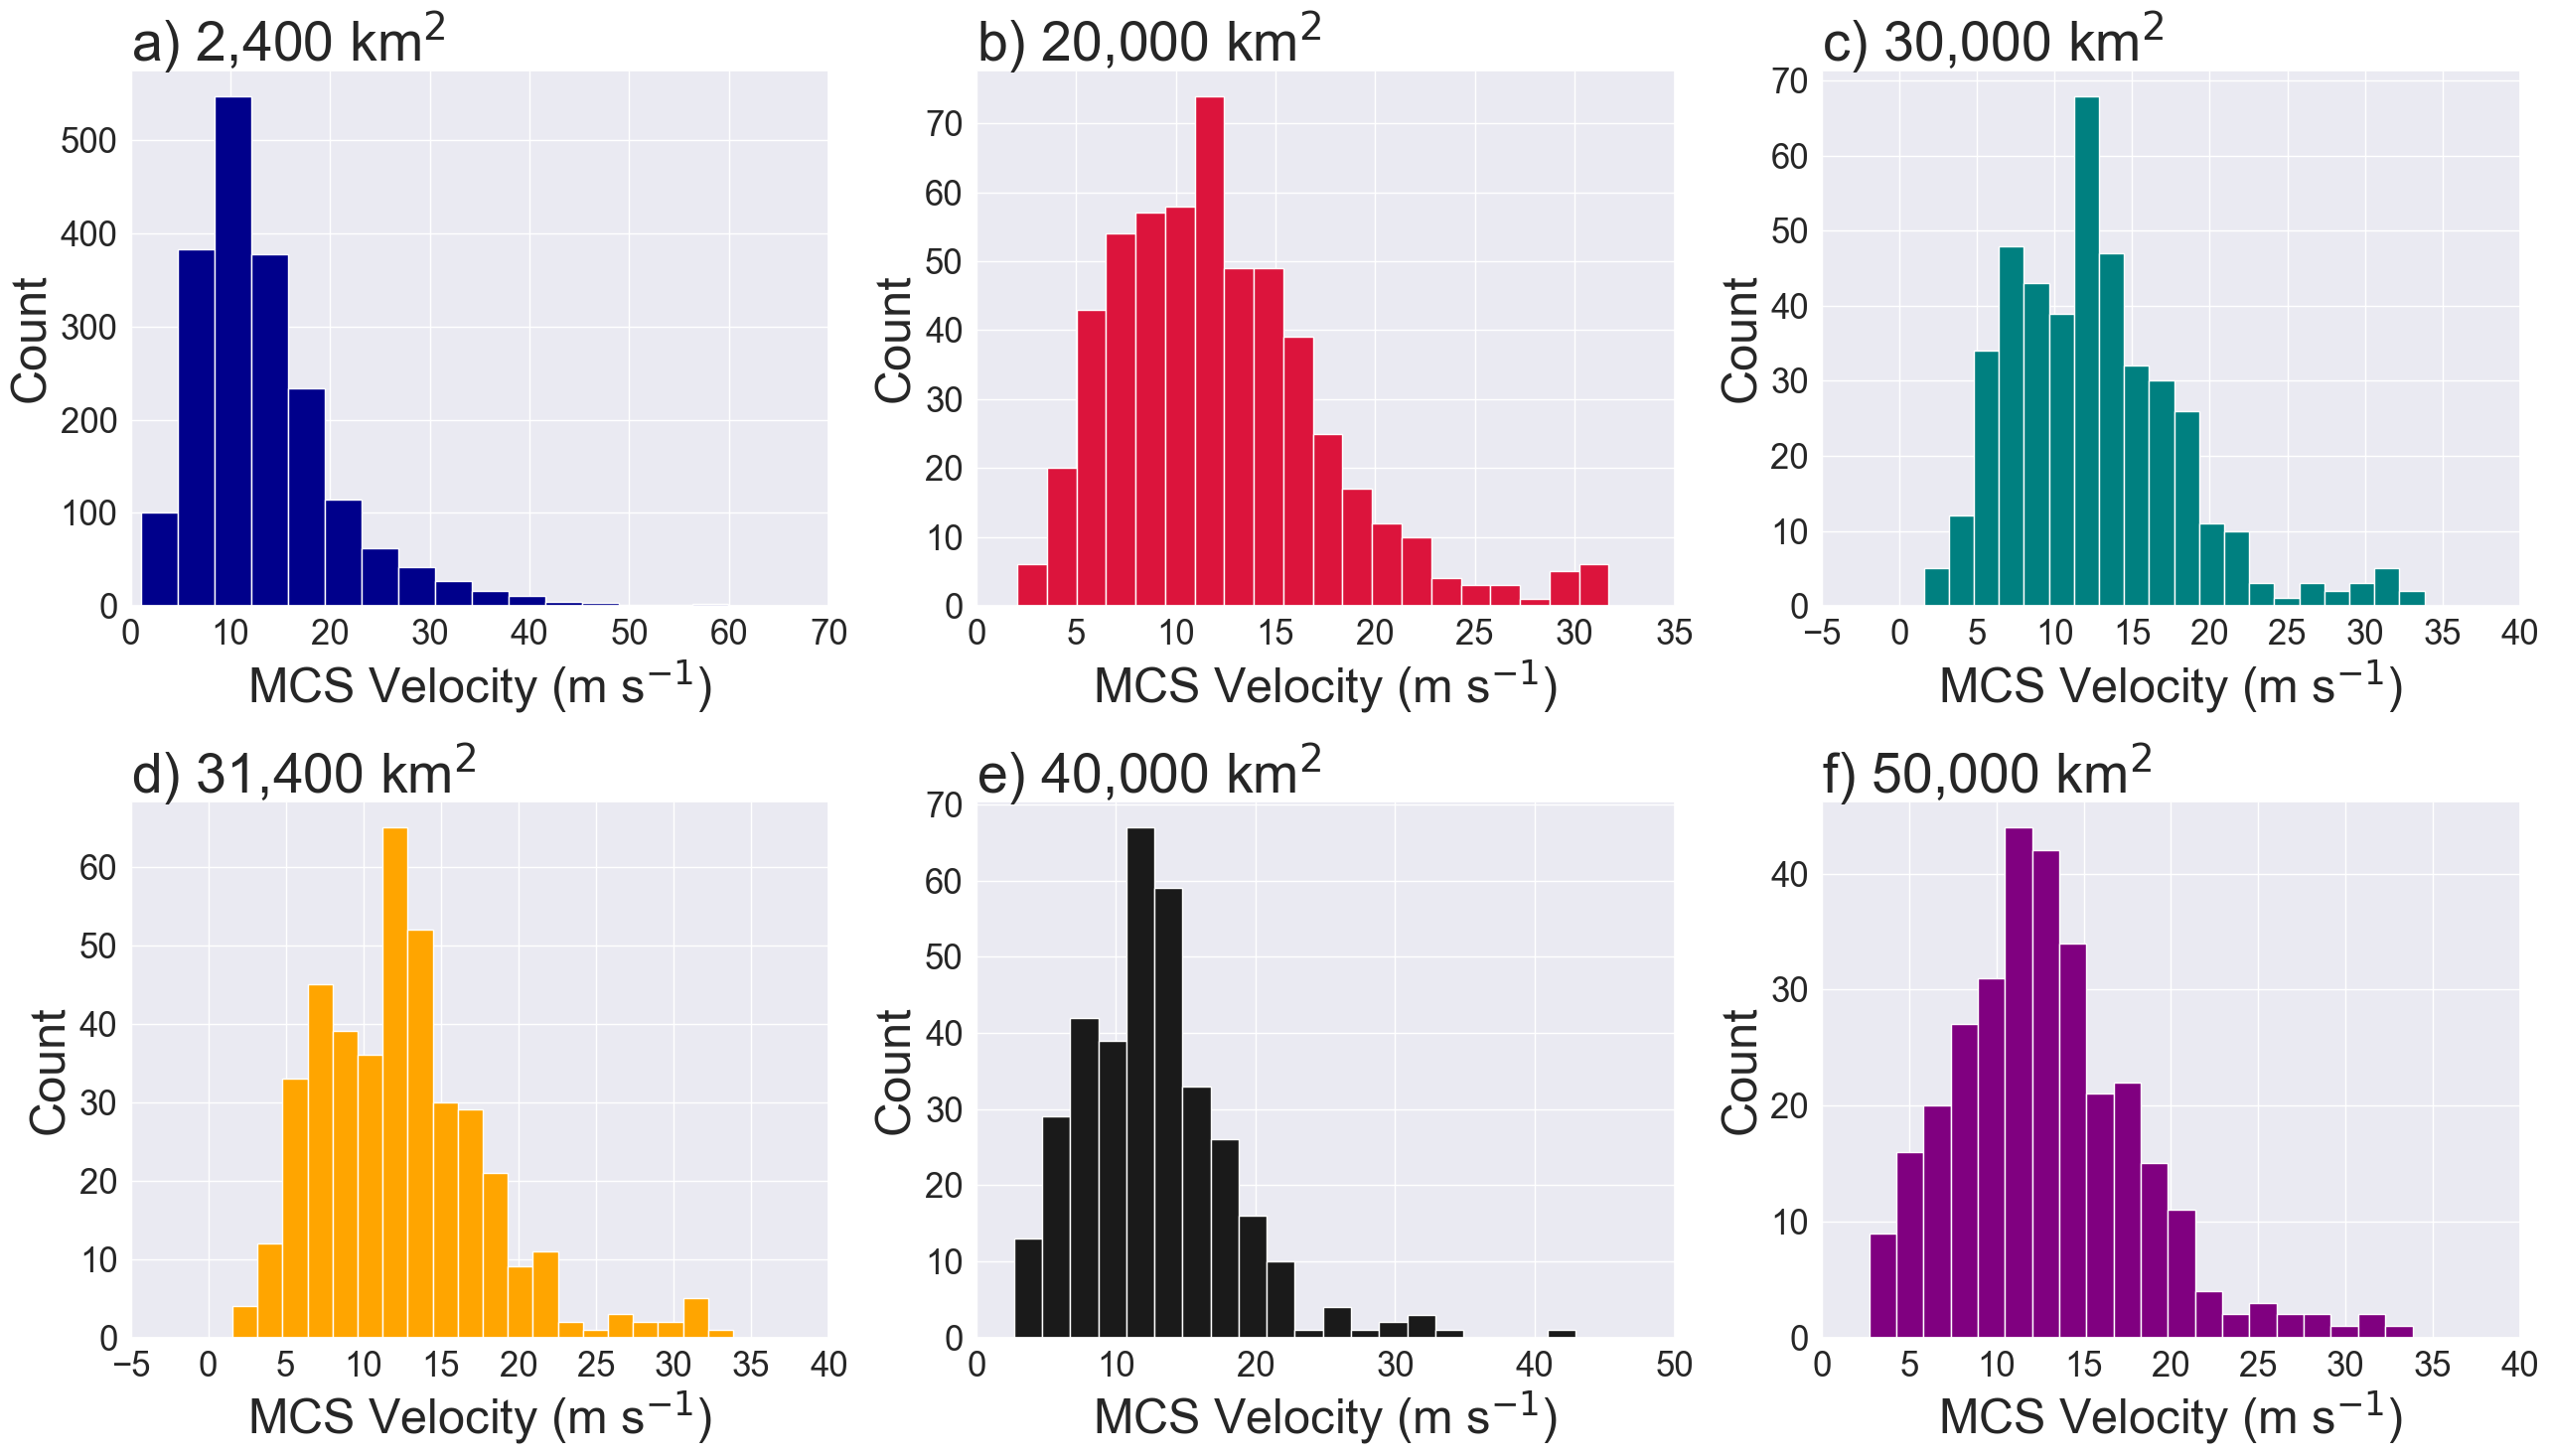

In [173]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
t= 40
f = 35
lf= 25

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax1.hist(velocity_nmin118, bins=bins,align='mid',color='darkblue')
ax1.set_xlim(0,70)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=lf)
ax1.set_xticks(ax1.get_xticks().astype(int))
ax1.xaxis.set_tick_params(labelsize=lf)
ax1.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Count',fontsize=f)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax2.hist(velocity_nmin987, bins=bins,align='mid',color='crimson')
ax2.set_yticklabels(ax2.get_yticks().astype(int),fontsize=lf)
ax2.set_xticks(ax2.get_xticks().astype(int),fontsize=lf)
ax2.xaxis.set_tick_params(labelsize=lf)
ax2.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Count',fontsize=f)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax3.hist(velocity_nmin1481, bins=bins,align='mid',color='teal')
ax3.set_yticklabels(ax3.get_yticks().astype(int),fontsize=lf)
ax3.set_xticks(ax3.get_xticks().astype(int),fontsize=lf)
ax3.xaxis.set_tick_params(labelsize=lf)
ax3.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Count',fontsize=f)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax4.hist(velocity_nmin1550, bins=bins,align='mid',color='orange')
ax4.set_yticklabels(ax4.get_yticks().astype(int),fontsize=lf)
ax4.set_xticks(ax4.get_xticks().astype(int),fontsize=lf)
ax4.xaxis.set_tick_params(labelsize=lf)
ax4.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Count',fontsize=f)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax5.hist(velocity_nmin1975, bins=bins,align='mid',color='k')
ax5.set_yticklabels(ax5.get_yticks().astype(int),fontsize=lf)
ax5.set_xticks(ax5.get_xticks().astype(int),fontsize=lf)
ax5.xaxis.set_tick_params(labelsize=lf)
ax5.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax5.set_ylabel('Count',fontsize=f)

ax6= plt.subplot(2,3,6)
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= t)
bins = 20
ax6.hist(velocity_nmin2469, bins=bins,align='mid',color='purple')
ax6.set_yticklabels(ax6.get_yticks().astype(int),fontsize=lf)
ax6.set_xticks(ax6.get_xticks().astype(int),fontsize=lf)
ax6.xaxis.set_tick_params(labelsize=lf)
ax6.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax6.set_ylabel('Count',fontsize=f)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/nminthreshold/vel_hist_nminthresholds.png')



In [174]:
#code from the calculate lifetime function in tobac but here I've taken it out of the function so that it's easier to 
#apply to histograms, means, max and mins. It has also been converted from minutes to hours

bin_edges=np.arange(6,30,2)
density=False

mcstracks_118_cell = tracks_nmin_118.groupby("cell")
minutes_118 = (mcstracks_118_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_118 = minutes_118/60 #converting from minutes to hours

mcstracks_987_cell = tracks_nmin987.groupby("cell")
minutes_987 = (mcstracks_987_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_987 = minutes_987/60

mcstracks_1481_cell = tracks_nmin1481.groupby("cell")
minutes_1481 = (mcstracks_1481_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_1481 = minutes_1481/60

mcstracks_1550_cell = tracks_nmin1550.groupby("cell")
minutes_1550 = (mcstracks_1550_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_1550 = minutes_1550/60

mcstracks_1975_cell = tracks_nmin1975.groupby("cell")
minutes_1975 = (mcstracks_1975_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_1975 = minutes_1975/60

mcstracks_2469_cell = tracks_nmin2469.groupby("cell")
minutes_2469 = (mcstracks_2469_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_2469 = minutes_2469/60

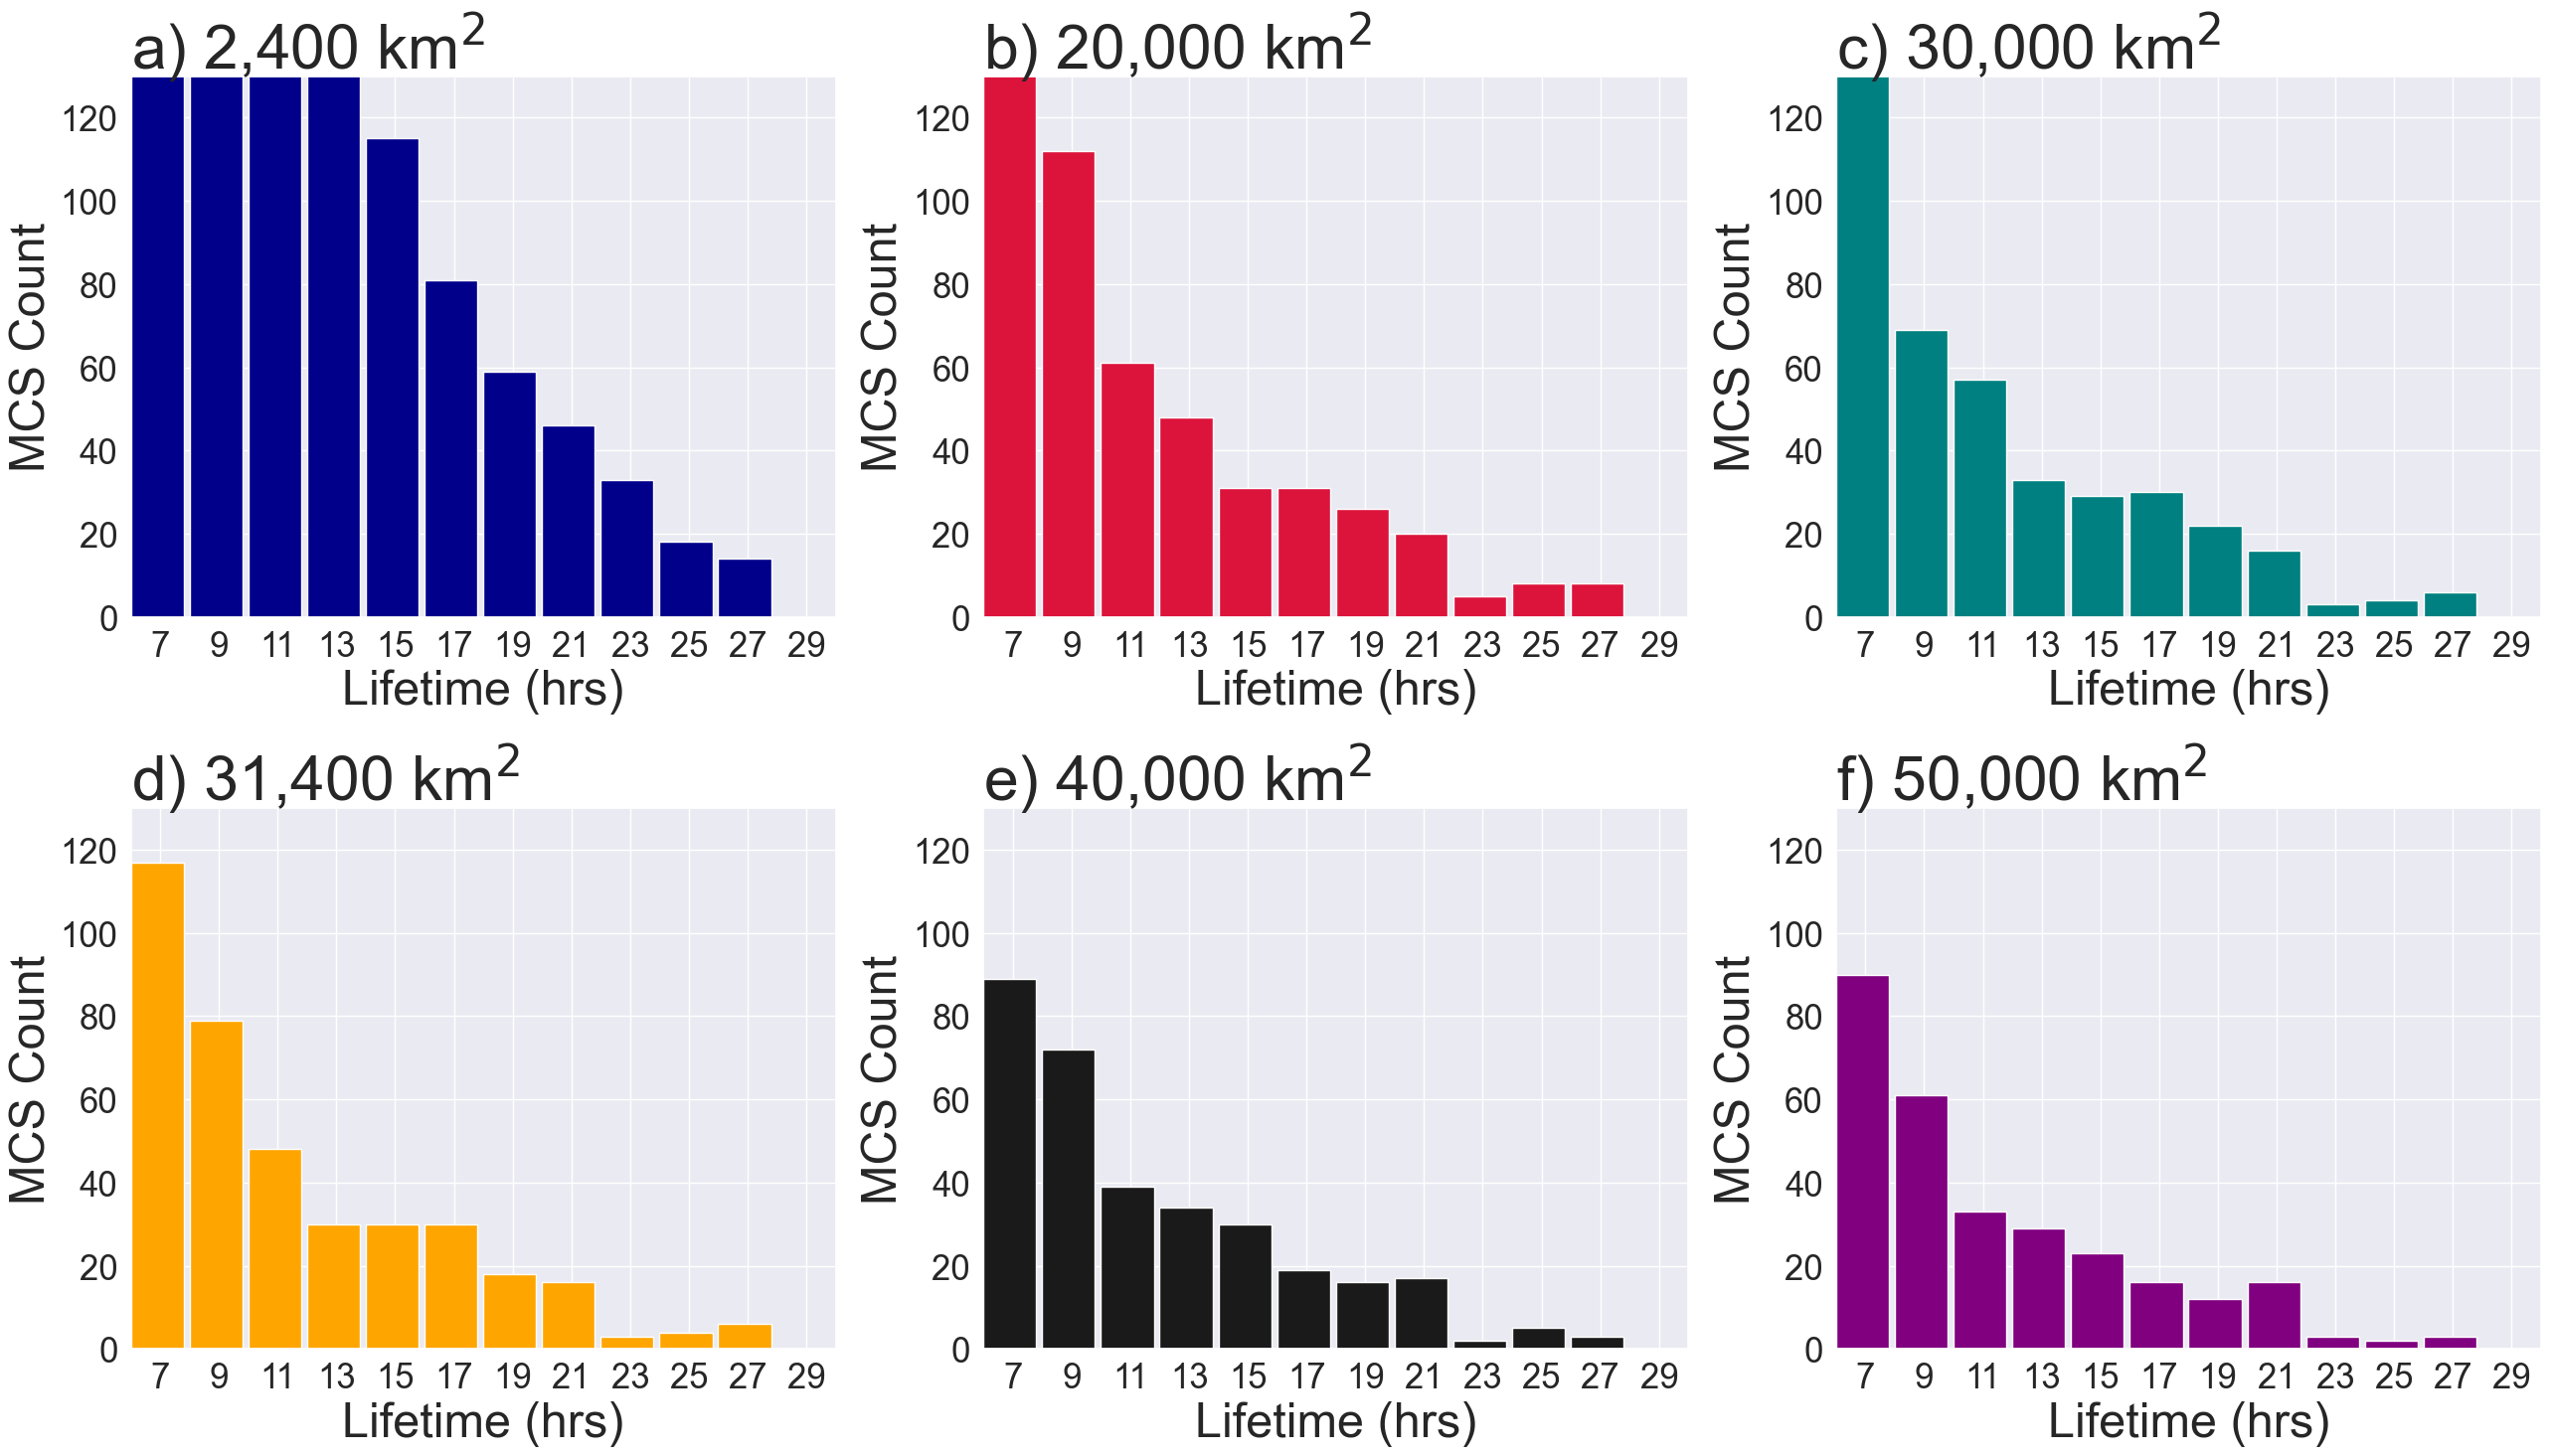

In [175]:
#plots of MCS lifetime
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 45
lf = 35
l = 25

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 2,400 km$^{2}$', loc='left', fontsize= f)
bins=bin_edges
ax1.hist(lifetime_118, bins=bin_edges,color='darkblue',align='mid',width=1.8)
ax1.set_xlim(6,30)
ax1.set_ylim(0,130)
ax1.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax1.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax1.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax1.set_ylabel('MCS Count',fontsize=lf)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= f)
bins = bin_edges
ax2.hist(lifetime_987, bins=bin_edges,align='mid',color='crimson',width=1.8)
ax2.set_xlim(6,30)
ax2.set_ylim(0,130)
ax2.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax2.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax2.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax2.set_ylabel('MCS Count',fontsize=lf)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= f)
bins = bin_edges
ax3.hist(lifetime_1481, bins=bin_edges,align='mid',color='teal',width=1.8)
ax3.set_xlim(6,30)
ax3.set_ylim(0,130)
ax3.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax3.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax3.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax3.set_ylabel('MCS Count',fontsize=lf)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= f)
bins = bin_edges
ax4.hist(lifetime_1550, bins=bin_edges,align='mid',color='orange',width=1.8)
ax4.set_xlim(6,30)
ax4.set_ylim(0,130)
ax4.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax4.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax4.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax4.set_ylabel('MCS Count',fontsize=lf)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= f)
bins = bin_edges
ax5.hist(lifetime_1975, bins=bin_edges,align='mid',color='k',width=1.8)
ax5.set_xlim(6,30)
ax5.set_ylim(0,130)
ax5.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax5.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax5.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax5.set_ylabel('MCS Count',fontsize=lf)

ax6= plt.subplot(2,3,6)
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= f)
bins = bin_edges
ax6.hist(lifetime_2469, bins=bin_edges,align='mid',color='purple',width=1.8)
ax6.set_xlim(6,30)
ax6.set_ylim(0,130)
ax6.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax6.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax6.set_xlabel('Lifetime (hrs)',fontsize=lf)
ax6.set_ylabel('MCS Count',fontsize=lf)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/nminthreshold/lifetime_hist_nmin_thresholds_Jan1998.png')

